FIRST MODEL

In [7]:
import pandas
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Make a dictionary of data for boot sizes
# and harness size in cm
data = {
    'boot_size' : [ 39, 38, 37, 39, 38, 35, 37, 36, 35, 40, 
                    40, 36, 38, 39, 42, 42, 36, 36, 35, 41, 
                    42, 38, 37, 35, 40, 36, 35, 39, 41, 37, 
                    35, 41, 39, 41, 42, 42, 36, 37, 37, 39,
                    42, 35, 36, 41, 41, 41, 39, 39, 35, 39
 ],
    'harness_size': [ 58, 58, 52, 58, 57, 52, 55, 53, 49, 54,
                59, 56, 53, 58, 57, 58, 56, 51, 50, 59,
                59, 59, 55, 50, 55, 52, 53, 54, 61, 56,
                55, 60, 57, 56, 61, 58, 53, 57, 57, 55,
                60, 51, 52, 56, 55, 57, 58, 57, 51, 59
                ]
}
# Convert it into a table using pandas
dataset = pandas.DataFrame(data)
dataset #print

,boot_size,harness_size
0,39,58
1,38,58
2,37,52
3,39,58
4,38,57
5,35,52
6,37,55
7,36,53
8,35,49
9,40,54


In [9]:
#SELECT A MODEL
import statsmodels.formula.api as smf
# This says that boot_size is explained by harness_size
formula = "boot_size ~ harness_size"
# Create the model, but don't train it yet
model = smf.ols(formula = formula, data = dataset)
#it does not have internal parameters set yet
if not hasattr(model, 'params'):
    print("Model selected but it does not have parameters set. We need to train it!")


Model selected but it does not have parameters set. We need to train it!


In [10]:
#TRAIN MODEL
fitted_model = model.fit()
# Print information about our model now it has been fit
print("The following model parameters have been found:\n" +
        f"Line slope (m): {fitted_model.params[1]}\n"+
        f"Line Intercept (n): {fitted_model.params[0]}")

The following model parameters have been found:
Line slope (m): 0.5859254167382717
Line Intercept (n): 5.719109812682551


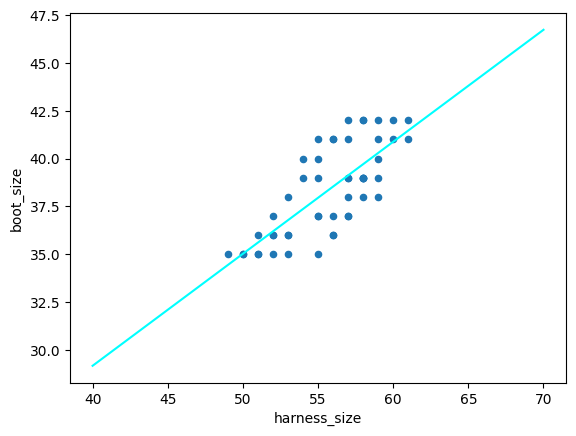

In [12]:
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np
m=fitted_model.params[1]
b=fitted_model.params[0]
# Use the function (mx + b) to calculate f(x) for [0,100]
list = np.arange(40,70+1)
fx = (m * list) + b
# Create a scatter plot
dataset.plot.scatter(x='harness_size', y='boot_size')
# Plot the regression line
plt.plot(list,fx, color='cyan')
# Display the plot
plt.show()

In [13]:
# harness_size states the size of the harness we are interested in
harness_size = { 'harness_size' : [52.5] }

# Use the model to predict what size of boots the dog will fit
approximate_boot_size = fitted_model.predict(harness_size)

# Print the result
print("Estimated approximate_boot_size:")
print(approximate_boot_size[0])

Estimated approximate_boot_size:
36.48019419144182


Entradas y salidas

In [14]:
import pandas
dataset = pandas.read_csv('data_doggy_boot_harness.csv')
# Print the data
# Because there are a lot of data, use head() to only print the first few rows
dataset.head()

,boot_size,harness_size,sex,age_years
0,39,58,male,12.0
1,38,58,male,9.6
2,37,52,female,8.6
3,39,58,male,10.2
4,38,57,male,7.8


In [15]:
# Look at the harness sizes
print("Harness sizes")
print(dataset.harness_size)

Harness sizes
0     58
1     58
2     52
3     58
4     57
5     52
6     55
7     53
8     49
9     54
10    59
11    56
12    53
13    58
14    57
15    58
16    56
17    51
18    50
19    59
20    59
21    59
22    55
23    50
24    55
25    52
26    53
27    54
28    61
29    56
30    55
31    60
32    57
33    56
34    61
35    58
36    53
37    57
38    57
39    55
40    60
41    51
42    52
43    56
44    55
45    57
46    58
47    57
48    51
49    59
Name: harness_size, dtype: int64


In [16]:
# Remove the sex and age-in-years columns.
del dataset["sex"]
del dataset["age_years"]

# Print the column names
print("\nAvailable columns after deleting sex and age information:")
print(dataset.columns.values)


Available columns after deleting sex and age information:
['boot_size' 'harness_size']


In [17]:
# Print the data at the top of the table
print("TOP OF TABLE")
print(dataset.head())

# print the data at the bottom of the table
print("\nBOTTOM OF TABLE")
print(dataset.tail())

TOP OF TABLE
   boot_size  harness_size
0         39            58
1         38            58
2         37            52
3         39            58
4         38            57

BOTTOM OF TABLE
    boot_size  harness_size
45         41            57
46         39            58
47         39            57
48         35            51
49         39            59


In [19]:
# Print how many rows of data we have
print(f"We have {len(dataset)} rows of data")

# Determine whether each avalanche dog's harness size is < 55
# This creates a True or False value for each row where True means 
# they are smaller than 55
is_small = dataset.harness_size < 55
print("\nWhether the dog's harness was smaller than size 55:")
print(is_small)


We have 50 rows of data

Whether the dog's harness was smaller than size 55:
0     False
1     False
2      True
3     False
4     False
5      True
6     False
7      True
8      True
9      True
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17     True
18     True
19    False
20    False
21    False
22    False
23     True
24    False
25     True
26     True
27     True
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36     True
37    False
38    False
39    False
40    False
41     True
42     True
43    False
44    False
45    False
46    False
47    False
48     True
49    False
Name: harness_size, dtype: bool


In [20]:

# Now apply this 'mask' to our data to keep the smaller dogs
data_from_small_dogs = dataset[is_small]
print("\nData for dogs with harness smaller than size 55:")
print(data_from_small_dogs)

# Print the number of small dogs
print(f"\nNumber of dogs with harness size less than 55: {len(data_from_small_dogs)}")


Data for dogs with harness smaller than size 55:
    boot_size  harness_size
2          37            52
5          35            52
7          36            53
8          35            49
9          40            54
12         38            53
17         36            51
18         35            50
23         35            50
25         36            52
26         35            53
27         39            54
36         36            53
41         35            51
42         36            52
48         35            51

Number of dogs with harness size less than 55: 16


In [21]:
# Make a copy of the dataset that only contains dogs with 
# a boot size below size 40
# The call to copy() is optional but can help avoid unexpected
# behaviour in more complex scenarios
data_smaller_paws = dataset[dataset.boot_size < 40].copy()


# Print information about this
print(f"We now have {len(data_smaller_paws)} rows in our dataset. The last few rows are:")
data_smaller_paws.tail()

We now have 34 rows in our dataset. The last few rows are:


,boot_size,harness_size
42,36,52
46,39,58
47,39,57
48,35,51
49,39,59


In [22]:
import plotly.express

ModuleNotFoundError: No module named 'plotly'